In [85]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import regionmask
import numpy as np
import cartopy.crs as ccrs
import pandas as pn

In [3]:
bottomt = xr.open_dataset('tob.nwa.full.ss_fcast.monthly.regrid.r20250212.enss.i202502.nc')

In [4]:
#import the shapefiles
epu = gpd.read_file('/Users/laura.gruenburg/Documents/GitHub/MOM6_Validation/SOE/EPU_shape/EPU_NOESTUARIES.shp')
# Specify the EPUs
mab = epu[epu.EPU == 'MAB']
gom = epu[epu.EPU == 'GOM']
gb = epu[epu.EPU == 'GB']

In [5]:
def crop_nd(data, longitude_name, latitude_name, shape):
    
    # Get the region of interest
    region = regionmask.from_geopandas(shape)
    
    # Create the mask
    mask = region.mask(data[longitude_name].astype('f4'), data[latitude_name].astype('f4'))
    
    # Apply mask to the data
    masked_ds = data.where(mask == region.numbers[0])
    
    return masked_ds

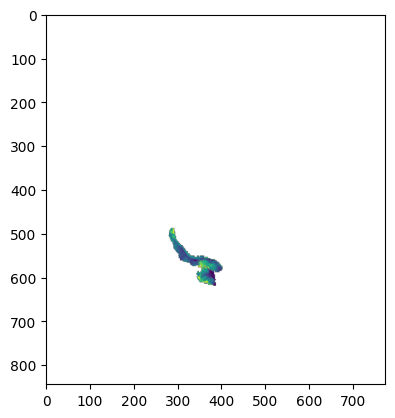

In [99]:
plt.imshow(bottomtgom.mean('member').tob_anom[0,:,:])
plt.imshow(bottomtmab.mean('member').tob_anom[0,:,:])
plt.imshow(bottomtgb.mean('member').tob_anom[0,:,:])
plt.show()

In [66]:
bottomtmab = crop_nd(bottomt, 'lon', 'lat', mab)
bottomtgom = crop_nd(bottomt, 'lon', 'lat', gom)
bottomtgb = crop_nd(bottomt, 'lon', 'lat', gb)

In [ ]:
bottomtmab

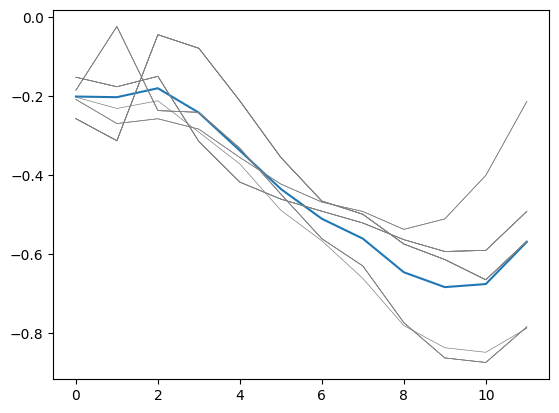

In [94]:
plt.plot(bottomtgom.mean(['member','lat','lon']).tob_anom)
for i in range(5):
    plt.plot(bottomtgom.mean(['lat','lon']).tob_anom.sel(member = slice(i+1)), c = 'grey', linewidth = 0.5)
plt.show()

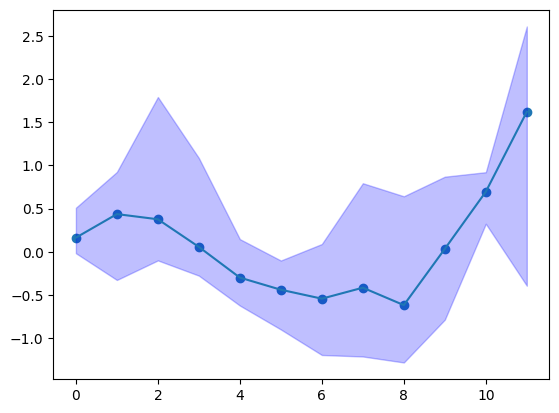

In [10]:
plt.plot(bottomtmab.mean(['member','lat','lon']).tob_anom)
plt.scatter(np.arange(0,12), bottomtmab.mean(['member','lat','lon']).tob_anom)
plt.fill_between(np.arange(0,12),bottomtmab.mean(['lat','lon']).max('member').tob_anom, bottomtmab.mean(['lat','lon']).min('member').tob_anom, alpha = 0.25, color = 'b') #, c = 'grey', linewidth = 0.5)
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/var/folders/cy/6gn96r1n0jl__9c6hbr_176r0000gp/T/ipykernel_6296/2474742337.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_ylabel('Temperature Anomaly ($^\circ$C)', fontsize = 12)


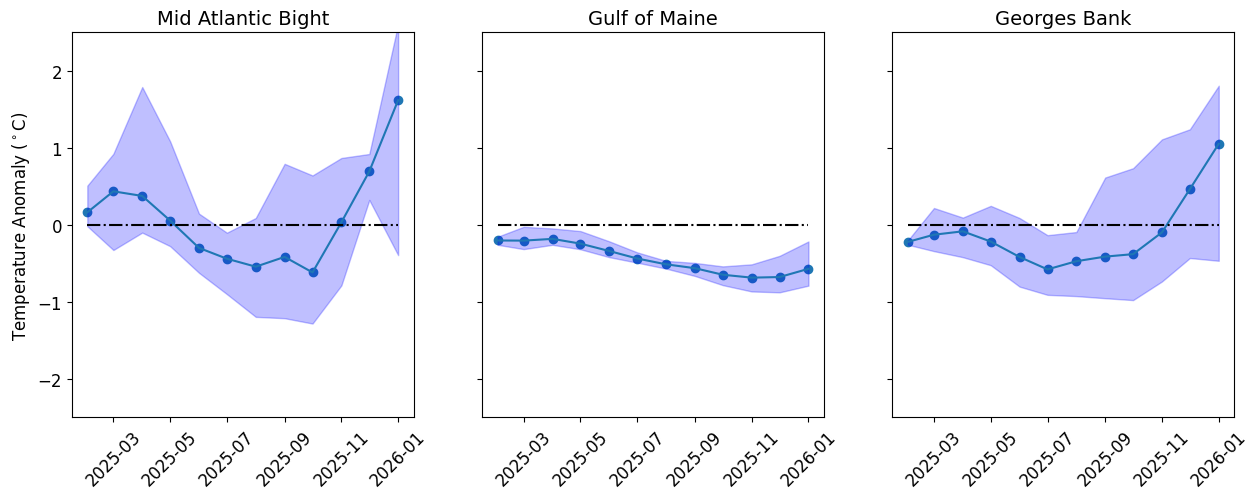

In [112]:
fig, ax = plt.subplots(ncols = 3, figsize = [15,5], sharey = True)
ax[0].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'), bottomtmab.mean(['member','lat','lon']).tob_anom)
ax[0].scatter(pn.date_range('02-2025', '01-2026', freq = 'MS'), bottomtmab.mean(['member','lat','lon']).tob_anom)
ax[0].fill_between(pn.date_range('02-2025', '01-2026', freq = 'MS'),bottomtmab.mean(['lat','lon']).max('member').tob_anom, bottomtmab.mean(['lat','lon']).min('member').tob_anom, alpha = 0.25, color = 'b') #, c = 'grey', linewidth = 0.5)
ax[0].set_title('Mid Atlantic Bight', fontsize = 14)
ax[0].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'), [0,0,0,0,0,0,0,0,0,0,0,0], c = 'k', linestyle = '-.')
ax[0].set_ylim([-2.5,2.5])
ax[0].tick_params(labelsize = 12)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
ax[0].set_ylabel('Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[1].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'),bottomtgom.mean(['member','lat','lon']).tob_anom)
ax[1].scatter(pn.date_range('02-2025', '01-2026', freq = 'MS'), bottomtgom.mean(['member','lat','lon']).tob_anom)
ax[1].fill_between(pn.date_range('02-2025', '01-2026', freq = 'MS'),bottomtgom.mean(['lat','lon']).max('member').tob_anom, bottomtgom.mean(['lat','lon']).min('member').tob_anom, alpha = 0.25, color = 'b') #, c = 'grey', linewidth = 0.5)
ax[1].set_title('Gulf of Maine', fontsize = 14)
ax[1].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'), [0,0,0,0,0,0,0,0,0,0,0,0], c = 'k', linestyle = '-.')
ax[1].tick_params(labelsize = 12)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
    
ax[2].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'),bottomtgb.mean(['member','lat','lon']).tob_anom)
ax[2].scatter(pn.date_range('02-2025', '01-2026', freq = 'MS'), bottomtgb.mean(['member','lat','lon']).tob_anom)
ax[2].fill_between(pn.date_range('02-2025', '01-2026', freq = 'MS'),bottomtgb.mean(['lat','lon']).max('member').tob_anom, bottomtgb.mean(['lat','lon']).min('member').tob_anom, alpha = 0.25, color = 'b') #, c = 'grey', linewidth = 0.5)
ax[2].set_title('Georges Bank', fontsize = 14)
ax[2].plot(pn.date_range('02-2025', '01-2026', freq = 'MS'), [0,0,0,0,0,0,0,0,0,0,0,0], c = 'k', linestyle = '-.')
ax[2].tick_params(labelsize = 12)
for tick in ax[2].get_xticklabels():
    tick.set_rotation(45)
    
plt.show()

In [27]:
bottomtmab

<xarray.Dataset> Size: 314MB
Dimensions:   (lead: 12, member: 5, lat: 844, lon: 774)
Coordinates:
    init      datetime64[ns] 8B 2025-02-01
  * member    (member) int32 20B 1 2 3 4 5
    month     int32 4B 2
  * lead      (lead) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * lon       (lon) float64 6kB -98.44 -98.36 -98.28 ... -36.24 -36.16 -36.08
  * lat       (lat) float64 7kB 5.273 5.335 5.398 5.461 ... 58.04 58.1 58.16
Data variables:
    tob       (lead, member, lat, lon) float32 157MB nan nan nan ... nan nan nan
    tob_anom  (lead, member, lat, lon) float32 157MB nan nan nan ... nan nan nan
Attributes: (12/25)
    NumFilesInSet:          1
    title:                  NWA12_cobalt_forecast_2024_09_2025-02-e01
    associated_files:       areacello: 20250201.ocean_static.nc
    grid_type:              regular
    grid_tile:              N/A
    cefi_rel_path:          /Projects/CEFI/regional_mom6/cefi_portal/northwes...
    ...                     ...
    cefi_init_date:         i202502
    cefi_ensemble_info:     enss
    cefi_forcing:           N/A
    cefi_data_doi:          10.5281/zenodo.10642295
    cefi_paper_doi:         10.5194/egusphere-2024-394
    cefi_aux:               Postprocessed Data : regrid to regular grid

In [62]:
plushalf = np.empty([12,5,844,774])
minushalf = np.empty([12,5,844,774])
middlehalf = np.empty([12,5,844,774])

plushalf[np.where(bottomtmab.tob_anom >=0.5)] = 1
plushalf[np.where(bottomtmab.tob_anom <0.5)] = 0

minushalf[np.where(bottomtmab.tob_anom <=-0.5)] = 1
minushalf[np.where(bottomtmab.tob_anom >-0.5)] = 0

total_plus5 = (np.sum(plushalf,1)/5)*100
total_minus5 = (np.sum(minushalf,1)/5)*100

In [63]:
halfds = xr.Dataset(data_vars = {'hot': (['lead','lat','lon'], total_plus5),
                                'cold': (['lead','lat','lon'], total_minus5)},
                        coords = {'lead': bottomtmab.lead.values,
                                  'lat': bottomtmab.lat.values,
                                  'lon': bottomtmab.lon.values})

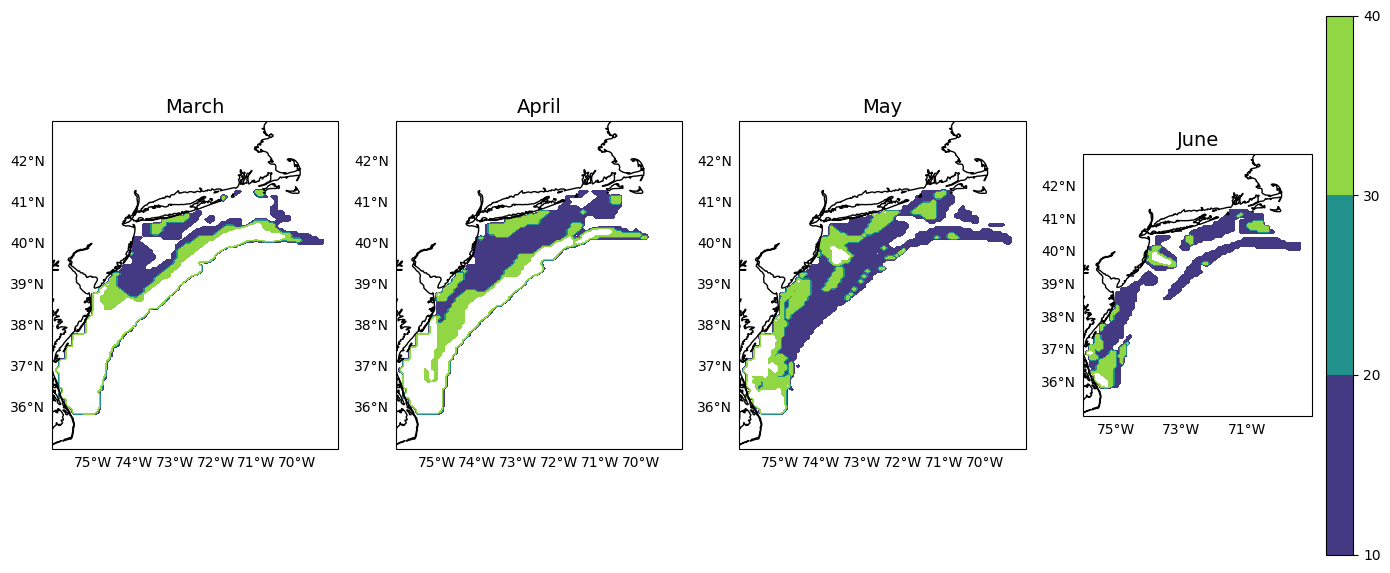

In [61]:
fig, ax = plt.subplots(ncols = 4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(17, 7))
titles = ['March', 'April','May', 'June']
for i in range(4):
    ax[i].set_extent([-76, -69, 35, 43], crs=ccrs.PlateCarree())
    ax[i].coastlines()
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    c1 = ax[i].contourf(plushalfds.lon, plushalfds.lat, halfds.hot[i+1,:,:], levels = np.arange(10,50,10))
    #c2 = ax[i].contour(mab_gl_jjas.longitude, mab_gl_jjas.latitude, mab_gl_jjas.tob.groupby('time.month').mean('time').sel(month = i+6), levels = [10], colors = 'darkorchid', labels = 'GLORYS12')
    ax[i].set_title(titles[i], fontsize = 14)
#ax[0].annotate('MOM6', [-73, 38.8], color = 'green')
#ax[0].annotate('GLORYS12', [-74, 37.8], color = 'darkorchid')
fig.colorbar(c1, ax = ax[3])
plt.show()


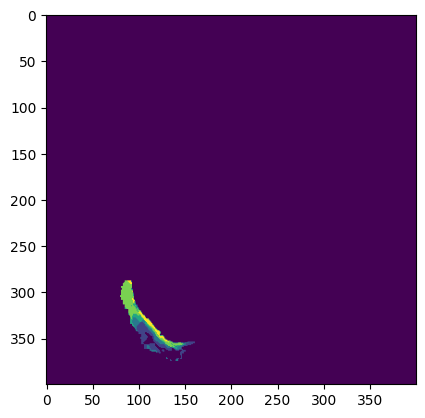

/var/folders/cy/6gn96r1n0jl__9c6hbr_176r0000gp/T/ipykernel_6296/408592658.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(c)


In [57]:
c = plt.imshow(plushalfds.hot[1,200:600, 200:600])
plt.show()
plt.colorbar(c)

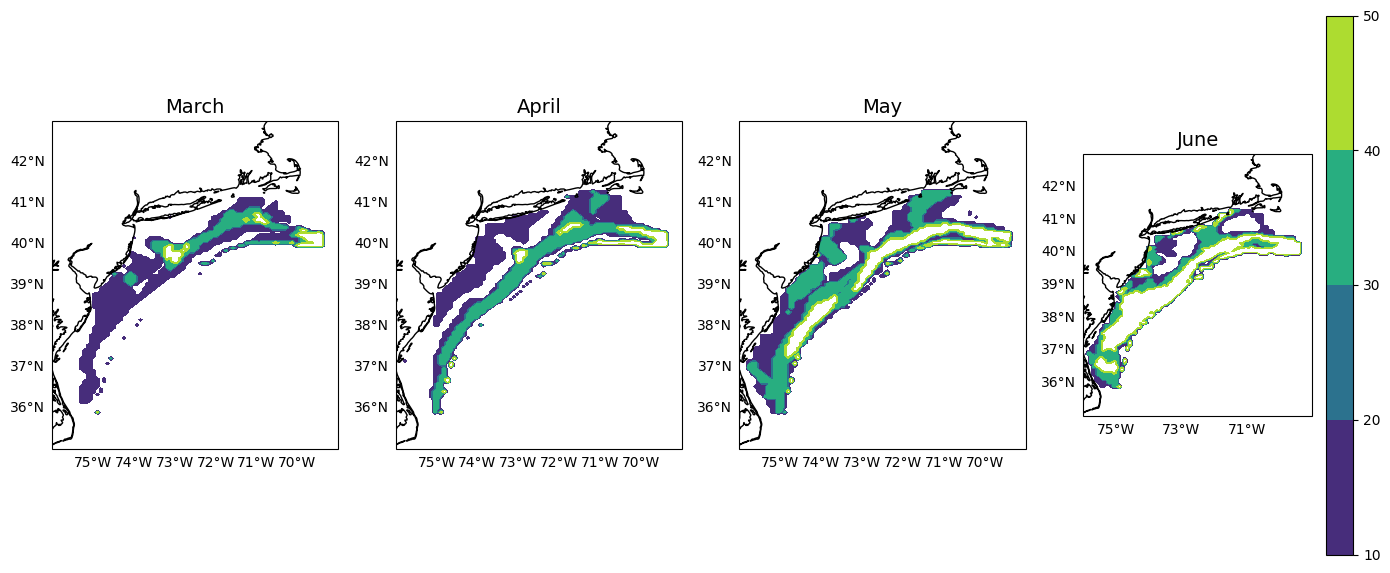

In [65]:
fig, ax = plt.subplots(ncols = 4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(17, 7))
titles = ['March', 'April','May', 'June']
for i in range(4):
    ax[i].set_extent([-76, -69, 35, 43], crs=ccrs.PlateCarree())
    ax[i].coastlines()
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    c1 = ax[i].contourf(plushalfds.lon, plushalfds.lat, halfds.cold[i+1,:,:], levels = np.arange(10,60,10))
    #c2 = ax[i].contour(mab_gl_jjas.longitude, mab_gl_jjas.latitude, mab_gl_jjas.tob.groupby('time.month').mean('time').sel(month = i+6), levels = [10], colors = 'darkorchid', labels = 'GLORYS12')
    ax[i].set_title(titles[i], fontsize = 14)
#ax[0].annotate('MOM6', [-73, 38.8], color = 'green')
#ax[0].annotate('GLORYS12', [-74, 37.8], color = 'darkorchid')
fig.colorbar(c1, ax = ax[3])
plt.show()

In [88]:
pn.date_range('02-2025', '01-2026', freq = 'MS')

DatetimeIndex(['2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
               '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01',
               '2025-10-01', '2025-11-01', '2025-12-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='MS')